<a href="https://colab.research.google.com/github/Eminent01/ALX-Data_Analyst/blob/main/comparison_of_ML_models_in_predicting_egg_production_using_a_4_day_weather_data_Copy2_(1)_(1).ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [114]:
import numpy as np
import statsmodels.api as sm
import time
from sklearn.inspection import permutation_importance
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.feature_selection import RFE
from sklearn.model_selection import KFold, cross_val_score
from sklearn import model_selection
# np.random.seed(1234)
import warnings
warnings.filterwarnings('ignore')


In [115]:
# df =pd.read_excel('maclean.xlsx', sheet_name= 'Final data')

In [116]:
df=pd.read_excel("/content/maclean.xlsx")

# Prediciting egg production using weather parameters using 4days window data

In [117]:
df.head()

,PK,Farm ID,Farm name,Farm Site,Farm site number,State,Location,Geographic location,Date,Year,...,Total daily precipitation (mm),Solar radiation (MJ / meter squared per day),Outdoor Minimum temperature (C),Outdoor Maximum temperature (C),Vapour pressure 9am (kilopascal),Vapour pressure 3pm (kilopascal),Windspeed (m/s),Relative humidity,Relative humidity.1,Comments
0,MA1,Farm A,Maclean Farms,Homestead,S1,NSW,601 Homestead Rd QLD 4358,"27°48'23.4""S 151°42'16.8""E",2016-11-08,2016-11-08,...,0.12,18.59,16.77,33.31,1.53,1.36,2.98,77.44,42.03,NaN
1,MA2,Farm A,Maclean Farms,Homestead,S1,NSW,601 Homestead Rd QLD 4358,"27°48'23.4""S 151°42'16.8""E",2016-11-09,2016-11-09,...,3.98,23.56,16.69,33.16,2.01,1.41,3.15,100.00,43.97,NaN
2,MA3,Farm A,Maclean Farms,Homestead,S1,NSW,601 Homestead Rd QLD 4358,"27°48'23.4""S 151°42'16.8""E",2016-11-10,2016-11-10,...,0.06,18.80,16.32,33.45,1.72,1.30,2.07,89.16,40.61,NaN
3,MA4,Farm A,Maclean Farms,Homestead,S1,NSW,601 Homestead Rd QLD 4358,"27°48'23.4""S 151°42'16.8""E",2016-11-11,2016-11-11,...,0.00,18.02,17.46,32.20,1.79,2.22,1.89,87.41,69.70,NaN
4,MA5,Farm A,Maclean Farms,Homestead,S1,NSW,601 Homestead Rd QLD 4358,"27°48'23.4""S 151°42'16.8""E",2016-11-12,2016-11-12,...,7.84,24.85,19.10,34.87,1.95,1.23,2.92,86.03,34.07,NaN


In [118]:
import re

def removeChar(txt):
    new_txt = re.sub(r'[ /!#$%&*()-]', "_",txt)
    return new_txt
                     
df.columns = [removeChar(cols) for cols in df]
df.columns

Index(['PK', 'Farm_ID', 'Farm_name', 'Farm_Site', 'Farm_site_number', 'State',
       'Location', 'Geographic_location', 'Date', 'Year', 'Week_day',
       'Data_source', 'Shed_name', 'Shed_number', 'Shed_type', 'Batch_number',
       'Flock_ID', 'Production_stage', 'Breed_name', 'Age_of_hens__week_',
       'Age_of_hens__days_', 'Hours_of_light', 'Range_access_out',
       'Range_access_in', 'Loose_Birds_caught', 'Ammonium_level',
       'Mortality____Nestbox', 'Mortality___Ground', 'Mortality_hens___Range',
       'Mortality_hens___Cull', 'Total_mortality', 'Mortality____',
       'Cummulative_mortality____', 'Total_feed_consumption_silo_A__kg_',
       'Total_feed_consumption_Silo_B__kg_', 'Feed_consumption_hen_day__g_',
       'Water_consumption_hen_day__ml_', 'Indoor_Minimum_temperature__C_',
       'Indoor_Maximum_temperature__C_', 'Type_of_ventilation', 'Clean_eggs',
       'System_eggs', 'Floor_eggs', 'Waste_eggs', 'Total_eggs',
       'Number_of_hens', 'Laying_rate____', 'Tota

In [119]:
chosen_features = ["Age_of_hens__days_","Laying_rate____",'Hours_of_light',"Indoor_Minimum_temperature__C_","Indoor_Maximum_temperature__C_",'Solar_radiation__MJ___meter_squared_per_day_', "Vapour_pressure_3pm__kilopascal_","Vapour_pressure_9am__kilopascal_",'Total_daily_precipitation__mm_',"Outdoor_Minimum_temperature__C__","Outdoor_Maximum_temperature__C__","_Windspeed__m_s_","Relative_humidity","Relative_humidity.1"]
df = df.filter(chosen_features)
df.head(10)

,Age_of_hens__days_,Laying_rate____,Hours_of_light,Indoor_Minimum_temperature__C_,Indoor_Maximum_temperature__C_,Solar_radiation__MJ___meter_squared_per_day_,Vapour_pressure_3pm__kilopascal_,Vapour_pressure_9am__kilopascal_,Outdoor_Minimum_temperature__C__,Outdoor_Maximum_temperature__C__,_Windspeed__m_s_,Relative_humidity,Relative_humidity.1
0,116,0.000000,14.25,19.3,30.3,18.59,1.36,1.53,16.77,33.31,2.98,77.44,42.03
1,117,0.000000,14.25,21.1,31,23.56,1.41,2.01,16.69,33.16,3.15,100.00,43.97
2,118,0.000000,14.25,22.5,32.6,18.80,1.30,1.72,16.32,33.45,2.07,89.16,40.61
3,119,0.000000,14.25,22,31.9,18.02,2.22,1.79,17.46,32.20,1.89,87.41,69.70
4,120,0.037544,14.25,21.6,30.9,24.85,1.23,1.95,19.10,34.87,2.92,86.03,34.07
5,121,0.040051,14.25,21.8,32.3,27.57,0.81,0.82,12.56,33.87,6.18,55.09,27.84
6,122,0.230311,14.25,22.8,32.6,24.85,0.87,1.01,9.88,25.76,6.40,81.82,41.93
7,123,0.127682,14.25,18.9,25.6,25.57,0.95,1.33,11.55,25.97,2.26,96.60,43.24
8,124,0.150225,14.25,16.6,26.1,24.97,1.04,1.35,14.09,29.68,0.45,83.03,38.87
9,125,0.000000,14.25,18.8,28.6,28.98,1.12,1.34,13.52,29.47,4.49,85.64,42.88


In [120]:
def check_NaN(dataframe):
    print("Total NaN:", dataframe.isnull().values.sum())
    print("NaN by column:\n",dataframe.isnull().sum())
    return

In [121]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2364 entries, 0 to 2363
Data columns (total 13 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Age_of_hens__days_                            2364 non-null   int64  
 1   Laying_rate____                               2364 non-null   float64
 2   Hours_of_light                                2364 non-null   object 
 3   Indoor_Minimum_temperature__C_                2364 non-null   object 
 4   Indoor_Maximum_temperature__C_                2364 non-null   object 
 5   Solar_radiation__MJ___meter_squared_per_day_  2364 non-null   float64
 6   Vapour_pressure_3pm__kilopascal_              2364 non-null   float64
 7   Vapour_pressure_9am__kilopascal_              2364 non-null   float64
 8   Outdoor_Minimum_temperature__C__              2364 non-null   float64
 9   Outdoor_Maximum_temperature__C__              2364 non-null   f

In [122]:
df['Hours_of_light'] = pd.to_numeric(df['Hours_of_light'],errors = 'coerce')
df['Indoor_Maximum_temperature__C_'] = pd.to_numeric(df['Indoor_Maximum_temperature__C_'],errors = 'coerce')
df = df[~df['Indoor_Minimum_temperature__C_'].isin([''])]
df['Indoor_Minimum_temperature__C_'] = pd.to_numeric(df['Indoor_Minimum_temperature__C_'],errors = 'coerce')
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2364 entries, 0 to 2363
Data columns (total 13 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Age_of_hens__days_                            2364 non-null   int64  
 1   Laying_rate____                               2364 non-null   float64
 2   Hours_of_light                                2266 non-null   float64
 3   Indoor_Minimum_temperature__C_                2282 non-null   float64
 4   Indoor_Maximum_temperature__C_                2286 non-null   float64
 5   Solar_radiation__MJ___meter_squared_per_day_  2364 non-null   float64
 6   Vapour_pressure_3pm__kilopascal_              2364 non-null   float64
 7   Vapour_pressure_9am__kilopascal_              2364 non-null   float64
 8   Outdoor_Minimum_temperature__C__              2364 non-null   float64
 9   Outdoor_Maximum_temperature__C__              2364 non-null   f

In [123]:
for col in df.columns:
    df[col]=df[col].fillna(df[col].mean())
check_NaN(df)

Total NaN: 0
NaN by column:
 Age_of_hens__days_                              0
Laying_rate____                                 0
Hours_of_light                                  0
Indoor_Minimum_temperature__C_                  0
Indoor_Maximum_temperature__C_                  0
Solar_radiation__MJ___meter_squared_per_day_    0
Vapour_pressure_3pm__kilopascal_                0
Vapour_pressure_9am__kilopascal_                0
Outdoor_Minimum_temperature__C__                0
Outdoor_Maximum_temperature__C__                0
_Windspeed__m_s_                                0
Relative_humidity                               0
Relative_humidity.1                             0
dtype: int64


In [124]:
laying_rate= df['Laying_rate____'].rolling(4).agg(['mean'])
laying_rate.columns = ['laying_rate_mean']

laying_rate1= df['Laying_rate____'].rolling(4).agg(['std'])
laying_rate1.columns = ['laying_rate_std']

Hours_of_light= df['Hours_of_light'].rolling(4).agg(['mean'])
Hours_of_light.columns = ['Hours_of_light_mean']

Hours_of_light1= df['Hours_of_light'].rolling(4).agg(['std'])
Hours_of_light1.columns = ['Hours_of_light_std']

outdoor_temp_min= df['Outdoor_Minimum_temperature__C__'].rolling(4).agg(['mean'])
outdoor_temp_min.columns = ['outdoor_temp_min_mean']

outdoor_temp_min1= df['Outdoor_Minimum_temperature__C__'].rolling(4).agg(['std'])
outdoor_temp_min1.columns = ['outdoor_temp_min_std']

outdoor_temp_max = df['Outdoor_Maximum_temperature__C__'].rolling(4).agg(['mean'])
outdoor_temp_max.columns= ['outdoor_temp_max_mean']

outdoor_temp_max1 = df['Outdoor_Maximum_temperature__C__'].rolling(4).agg(['std'])
outdoor_temp_max1.columns= ['outdoor_temp_max_std']

indoor_temp_min= df['Indoor_Minimum_temperature__C_'].rolling(4).agg(['mean'])
indoor_temp_min.columns = ['indoor_temp_min_mean']

indoor_temp_min1= df['Indoor_Minimum_temperature__C_'].rolling(4).agg(['std'])
indoor_temp_min1.columns = ['Indoor_temp_min_std']

indoor_temp_max = df['Indoor_Minimum_temperature__C_'].rolling(4).agg(['mean'])
indoor_temp_max.columns= ['Indoor_temp_max_mean']

indoor_temp_max1 = df['Indoor_Minimum_temperature__C_'].rolling(4).agg(['std'])
indoor_temp_max1.columns= ['Indoor_temp_max_std']

rh_9am=df['Relative_humidity'].rolling(4).agg(['mean'])
rh_9am.columns= ['rh_9am_mean']

rh_9am1=df['Relative_humidity'].rolling(4).agg(['std'])
rh_9am1.columns= ['rh_9am_std']

rh_3pm=df['Relative_humidity.1'].rolling(4).agg(['mean'])
rh_3pm.columns= ['rh_3pm_mean']

rh_3pm1=df['Relative_humidity.1'].rolling(4).agg(['std'])
rh_3pm1.columns= ['rh_3pm_std']

vp_9am=df['Vapour_pressure_9am__kilopascal_'].rolling(4).agg(['mean'])
vp_9am.columns= ['vp_9am_mean']

vp_9am1=df['Vapour_pressure_9am__kilopascal_'].rolling(4).agg(['std'])
vp_9am1.columns= ['vp_9am_std']

vp_3pm=df['Vapour_pressure_3pm__kilopascal_'].rolling(4).agg(['mean'])
vp_3pm.columns= ['vp_3pm_mean']

vp_3pm1=df['Vapour_pressure_3pm__kilopascal_'].rolling(4).agg(['std'])
vp_3pm1.columns= ['vp_3pm_std']

wind_speed=df['_Windspeed__m_s_'].rolling(4).agg(['mean'])
wind_speed.columns= ['wind_speed_mean']

wind_speed1=df['_Windspeed__m_s_'].rolling(4).agg(['std'])
wind_speed1.columns= ['wind_speed_std']

solar_radiation=df['Solar_radiation__MJ___meter_squared_per_day_'].rolling(4).agg(['mean'])
solar_radiation.columns= ['solar_radiation_mean']

solar_radiation1=df['Solar_radiation__MJ___meter_squared_per_day_'].rolling(4).agg(['std'])
solar_radiation1.columns= ['solar_radiation_std']

In [125]:
df_1= pd.concat([outdoor_temp_min, outdoor_temp_min1, outdoor_temp_max, outdoor_temp_max1, indoor_temp_min, indoor_temp_min1, indoor_temp_max, indoor_temp_max1, Hours_of_light, Hours_of_light1 ,rh_9am, rh_9am1, rh_3pm, rh_3pm1, vp_9am, vp_9am1, vp_3pm,vp_3pm1, solar_radiation, solar_radiation1, laying_rate, laying_rate1, wind_speed1, wind_speed], axis=1)
df_1.head()

,outdoor_temp_min_mean,outdoor_temp_min_std,outdoor_temp_max_mean,outdoor_temp_max_std,indoor_temp_min_mean,Indoor_temp_min_std,Indoor_temp_max_mean,Indoor_temp_max_std,Hours_of_light_mean,Hours_of_light_std,...,vp_9am_mean,vp_9am_std,vp_3pm_mean,vp_3pm_std,solar_radiation_mean,solar_radiation_std,laying_rate_mean,laying_rate_std,wind_speed_std,wind_speed_mean
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,16.8100,0.475605,33.03,0.565862,21.225,1.408013,21.225,1.408013,14.25,0.0,...,1.7625,0.198221,1.5725,0.434003,19.7425,2.566247,0.000000,0.000000,0.634527,2.5225
4,17.3925,1.233407,33.42,1.104446,21.800,0.594418,21.800,0.594418,14.25,0.0,...,1.8675,0.135247,1.5400,0.459347,21.3075,3.401876,0.009386,0.018772,0.620665,2.5075


In [126]:
#Joing of two dataframes together
df_2= pd.concat([df, df_1], axis=1)
df_2.head()

,Age_of_hens__days_,Laying_rate____,Hours_of_light,Indoor_Minimum_temperature__C_,Indoor_Maximum_temperature__C_,Solar_radiation__MJ___meter_squared_per_day_,Vapour_pressure_3pm__kilopascal_,Vapour_pressure_9am__kilopascal_,Outdoor_Minimum_temperature__C__,Outdoor_Maximum_temperature__C__,...,vp_9am_mean,vp_9am_std,vp_3pm_mean,vp_3pm_std,solar_radiation_mean,solar_radiation_std,laying_rate_mean,laying_rate_std,wind_speed_std,wind_speed_mean
0,116,0.000000,14.25,19.3,30.3,18.59,1.36,1.53,16.77,33.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,117,0.000000,14.25,21.1,31.0,23.56,1.41,2.01,16.69,33.16,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,118,0.000000,14.25,22.5,32.6,18.80,1.30,1.72,16.32,33.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,119,0.000000,14.25,22.0,31.9,18.02,2.22,1.79,17.46,32.20,...,1.7625,0.198221,1.5725,0.434003,19.7425,2.566247,0.000000,0.000000,0.634527,2.5225
4,120,0.037544,14.25,21.6,30.9,24.85,1.23,1.95,19.10,34.87,...,1.8675,0.135247,1.5400,0.459347,21.3075,3.401876,0.009386,0.018772,0.620665,2.5075


In [127]:
#To check for Null values
check_NaN(df_2)

Total NaN: 72
NaN by column:
 Age_of_hens__days_                              0
Laying_rate____                                 0
Hours_of_light                                  0
Indoor_Minimum_temperature__C_                  0
Indoor_Maximum_temperature__C_                  0
Solar_radiation__MJ___meter_squared_per_day_    0
Vapour_pressure_3pm__kilopascal_                0
Vapour_pressure_9am__kilopascal_                0
Outdoor_Minimum_temperature__C__                0
Outdoor_Maximum_temperature__C__                0
_Windspeed__m_s_                                0
Relative_humidity                               0
Relative_humidity.1                             0
outdoor_temp_min_mean                           3
outdoor_temp_min_std                            3
outdoor_temp_max_mean                           3
outdoor_temp_max_std                            3
indoor_temp_min_mean                            3
Indoor_temp_min_std                             3
Indoor_temp_max_mean

In [128]:
#Replacing of null values in the coulumns
for col in df_2.columns:
    df_2[col]=df_2[col].fillna(df_2[col].mean())

In [129]:
df_2.head()

,Age_of_hens__days_,Laying_rate____,Hours_of_light,Indoor_Minimum_temperature__C_,Indoor_Maximum_temperature__C_,Solar_radiation__MJ___meter_squared_per_day_,Vapour_pressure_3pm__kilopascal_,Vapour_pressure_9am__kilopascal_,Outdoor_Minimum_temperature__C__,Outdoor_Maximum_temperature__C__,...,vp_9am_mean,vp_9am_std,vp_3pm_mean,vp_3pm_std,solar_radiation_mean,solar_radiation_std,laying_rate_mean,laying_rate_std,wind_speed_std,wind_speed_mean
0,116,0.000000,14.25,19.3,30.3,18.59,1.36,1.53,16.77,33.31,...,1.432619,0.183942,1.252073,0.208023,19.331033,3.111382,75.024575,2.332280,0.941495,3.470981
1,117,0.000000,14.25,21.1,31.0,23.56,1.41,2.01,16.69,33.16,...,1.432619,0.183942,1.252073,0.208023,19.331033,3.111382,75.024575,2.332280,0.941495,3.470981
2,118,0.000000,14.25,22.5,32.6,18.80,1.30,1.72,16.32,33.45,...,1.432619,0.183942,1.252073,0.208023,19.331033,3.111382,75.024575,2.332280,0.941495,3.470981
3,119,0.000000,14.25,22.0,31.9,18.02,2.22,1.79,17.46,32.20,...,1.762500,0.198221,1.572500,0.434003,19.742500,2.566247,0.000000,0.000000,0.634527,2.522500
4,120,0.037544,14.25,21.6,30.9,24.85,1.23,1.95,19.10,34.87,...,1.867500,0.135247,1.540000,0.459347,21.307500,3.401876,0.009386,0.018772,0.620665,2.507500


In [130]:
df_2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2364 entries, 0 to 2363
Data columns (total 37 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Age_of_hens__days_                            2364 non-null   int64  
 1   Laying_rate____                               2364 non-null   float64
 2   Hours_of_light                                2364 non-null   float64
 3   Indoor_Minimum_temperature__C_                2364 non-null   float64
 4   Indoor_Maximum_temperature__C_                2364 non-null   float64
 5   Solar_radiation__MJ___meter_squared_per_day_  2364 non-null   float64
 6   Vapour_pressure_3pm__kilopascal_              2364 non-null   float64
 7   Vapour_pressure_9am__kilopascal_              2364 non-null   float64
 8   Outdoor_Minimum_temperature__C__              2364 non-null   float64
 9   Outdoor_Maximum_temperature__C__              2364 non-null   f

In [131]:
corr_matrix = df_2.corr()
corr_matrix["Laying_rate____"].sort_values(ascending=False)

Laying_rate____                                 1.000000
laying_rate_mean                                0.979404
Hours_of_light                                  0.504160
Hours_of_light_mean                             0.503322
outdoor_temp_min_std                            0.132045
rh_9am_std                                      0.079400
Indoor_temp_min_std                             0.056646
Indoor_temp_max_std                             0.056646
rh_3pm_mean                                     0.052098
Relative_humidity.1                             0.051067
rh_3pm_std                                      0.015929
vp_9am_std                                     -0.003755
Age_of_hens__days_                             -0.010797
outdoor_temp_max_std                           -0.032814
vp_3pm_std                                     -0.062771
wind_speed_std                                 -0.073990
laying_rate_std                                -0.082769
Indoor_Minimum_temperature__C_ 

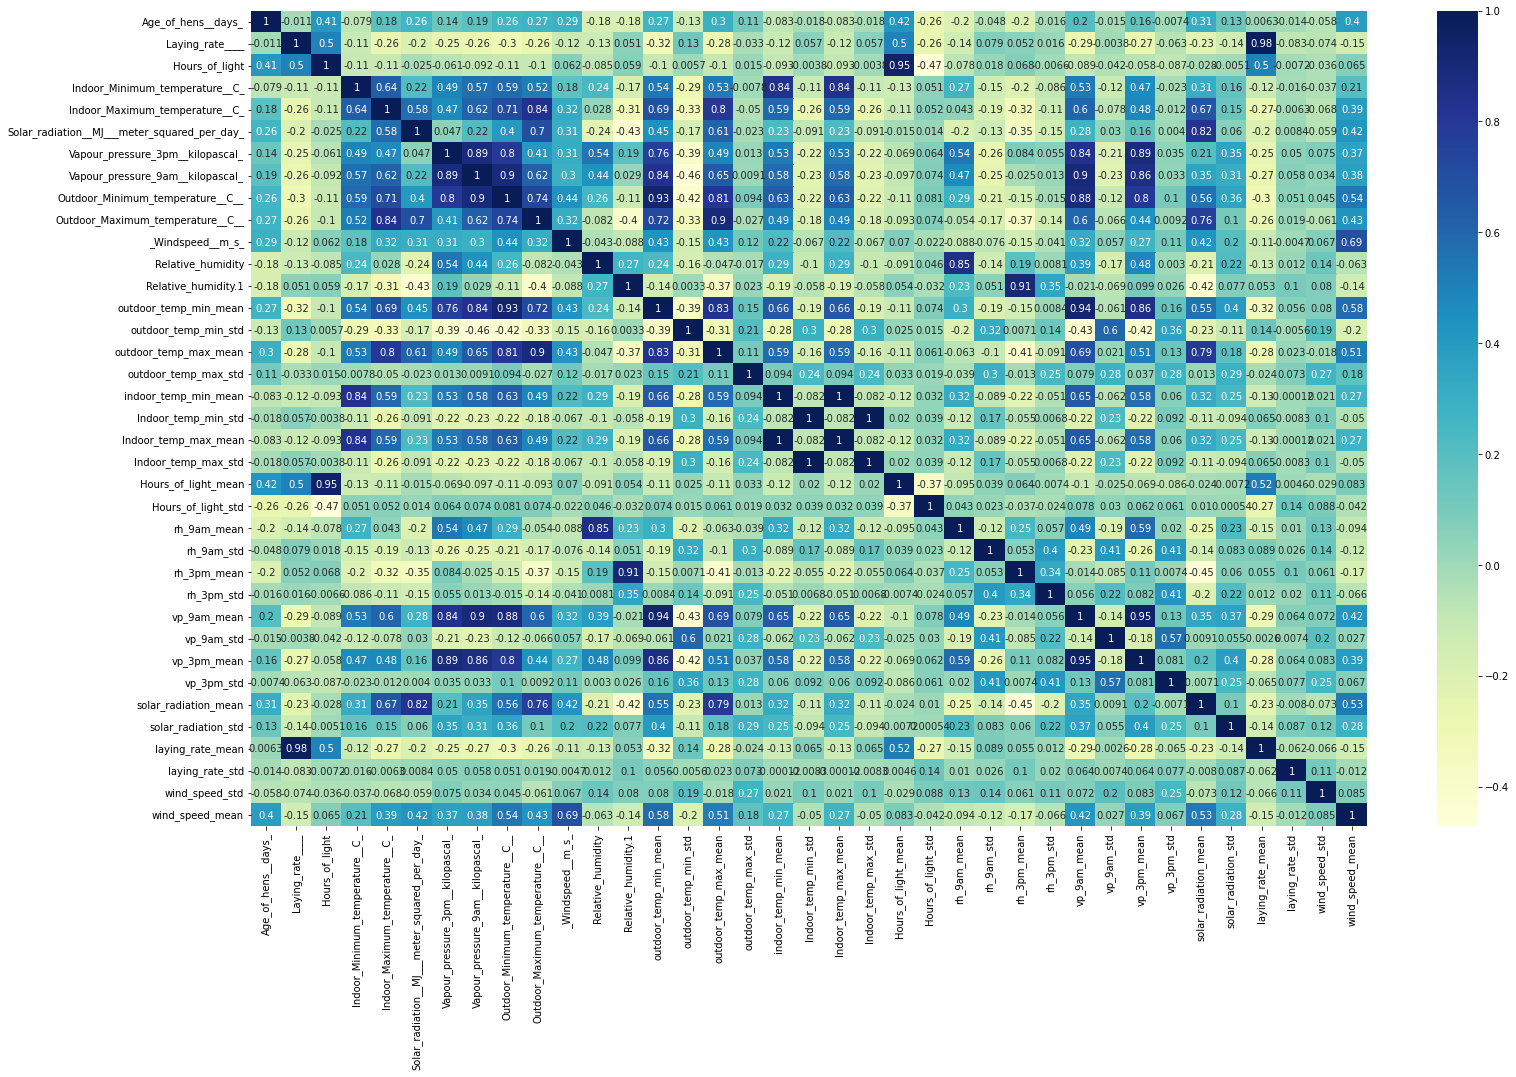

In [132]:
plt.figure(figsize=(25,15))
# sns.heatmap(corr_matrix)
sns.heatmap(df_2.corr(), cmap="YlGnBu", annot=True)

In [133]:
X = df_2.drop('Laying_rate____', axis=1)
y = df_2['Laying_rate____']

In [134]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2364 entries, 0 to 2363
Data columns (total 36 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Age_of_hens__days_                            2364 non-null   int64  
 1   Hours_of_light                                2364 non-null   float64
 2   Indoor_Minimum_temperature__C_                2364 non-null   float64
 3   Indoor_Maximum_temperature__C_                2364 non-null   float64
 4   Solar_radiation__MJ___meter_squared_per_day_  2364 non-null   float64
 5   Vapour_pressure_3pm__kilopascal_              2364 non-null   float64
 6   Vapour_pressure_9am__kilopascal_              2364 non-null   float64
 7   Outdoor_Minimum_temperature__C__              2364 non-null   float64
 8   Outdoor_Maximum_temperature__C__              2364 non-null   float64
 9   _Windspeed__m_s_                              2364 non-null   f

In [135]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [136]:
X = scaler.fit_transform(X)

In [137]:
# splitting of dataset
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=0)

# linear regession

In [138]:
from sklearn.linear_model import LinearRegression
mlr = LinearRegression()
mlr.fit(X_train, y_train)
y_pred_ln = mlr.predict(X_test)

MSE 72.05106963909911
RMSE 8.488290148145214
r2 0.9432121305939203


Text(0, 1, 'RSquared = 0.943')

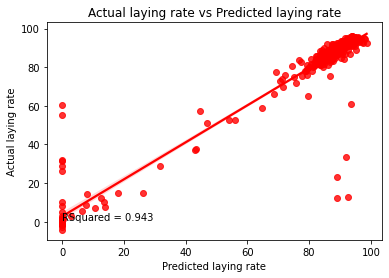

In [139]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred_ln))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_ln)))
from sklearn.metrics import r2_score
print("r2",r2_score(y_test,y_pred_ln))
# plt.scatter( y_pred, y_test)
sns.regplot(x=y_test ,y= y_pred_ln,color ="red")
plt.xlabel("Predicted laying rate")
plt.ylabel("Actual laying rate")
plt.title("Actual laying rate vs Predicted laying rate")
plt.annotate("RSquared = {:.3f}".format(r2_score(y_test, y_pred_ln)), (0, 1))


# Random forest

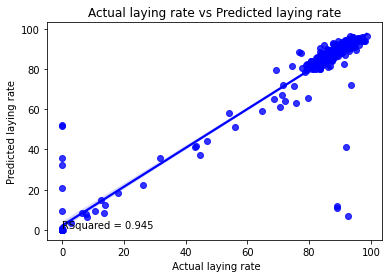

In [140]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor(n_estimators=100, random_state=0)
rf.fit(X_train, y_train)
y_pred_fr = rf.predict(X_test)

# plt.scatter(y_test, y_pred)
sns.regplot(x=y_test ,y= y_pred_fr,color ="blue")
plt.xlabel(" Actual laying rate")
plt.ylabel("Predicted laying rate")
plt.title("Actual laying rate vs Predicted laying rate")
plt.annotate("RSquared = {:.3f}".format(r2_score(y_test, y_pred_fr)), (0, 1))
plt.show()

In [141]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred_fr))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_fr)))
from sklearn.metrics import r2_score
print("r2",r2_score(y_test,y_pred_fr))
print(y_test)
# plt.scatter(y_pred,y_test)
# plt.xlabel("Predicted laying rate")
# plt.ylabel("Actual laying rate")
# plt.title("Actual laying rate vs Predicted laying rate")

MSE 69.97902189233118
RMSE 8.365346489675797
r2 0.9448452385746346
757      0.000000
1380    87.285692
721     81.887665
570     88.893574
245     90.238812
          ...    
161     92.956252
37      64.852848
249     90.040736
530      0.000000
799     93.053880
Name: Laying_rate____, Length: 473, dtype: float64


# Feature Importance calculation

In [142]:
rf.feature_importances_
importances = rf.feature_importances_
#
# Sort the feature importance in descending order
#
sorted_indices = np.argsort(importances)[::-1]
 
feat_labels = df_2.columns[0:]
 
for f in range(X_train.shape[1]):
    print("%2d) %-*s %f" % (f + 1, 30,
                            feat_labels[sorted_indices[f]],
                            importances[sorted_indices[f]]))

 1) solar_radiation_std            0.971897
 2) laying_rate_mean               0.007216
 3) Age_of_hens__days_             0.002384
 4) Relative_humidity              0.002136
 5) outdoor_temp_max_std           0.001408
 6) Laying_rate____                0.001195
 7) Indoor_temp_min_std            0.001105
 8) laying_rate_std                0.001027
 9) vp_9am_mean                    0.000980
10) Outdoor_Minimum_temperature__C__ 0.000795
11) Hours_of_light                 0.000724
12) rh_3pm_mean                    0.000690
13) outdoor_temp_min_mean          0.000661
14) Indoor_Minimum_temperature__C_ 0.000644
15) rh_9am_std                     0.000641
16) Hours_of_light_std             0.000615
17) _Windspeed__m_s_               0.000561
18) Vapour_pressure_9am__kilopascal_ 0.000557
19) outdoor_temp_max_mean          0.000480
20) outdoor_temp_min_std           0.000387
21) indoor_temp_min_mean           0.000370
22) wind_speed_std                 0.000368
23) solar_radiation_mean    

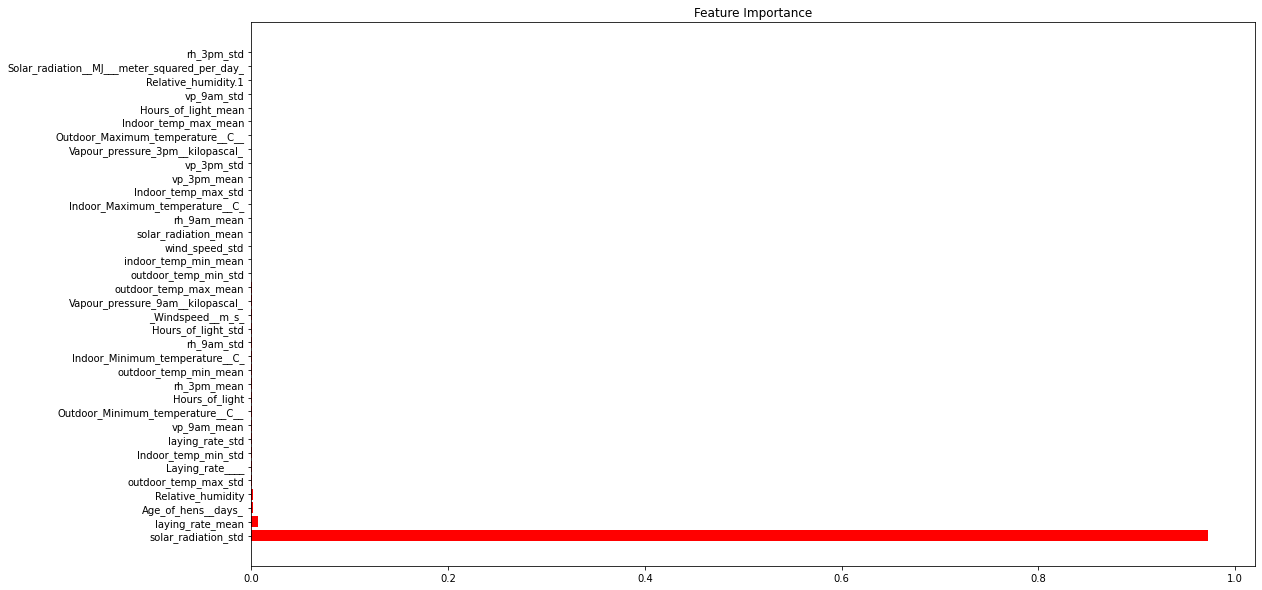

In [143]:

# Barplot: Add bars
plt.figure(figsize=(18,10))
# plt.figure()
plt.barh(range(X_train.shape[1]), importances[sorted_indices], color='r', align= "center")
# Add feature names as x-axis labels
plt.yticks(range(X_train.shape[1]),feat_labels[sorted_indices])
# Create plot title
plt.title("Feature Importance")
# Show plot
plt.show()

In [144]:
X_train.shape[1]

36

In [145]:
importances[sorted_indices]

array([9.71896570e-01, 7.21562055e-03, 2.38363954e-03, 2.13641478e-03,
       1.40786967e-03, 1.19548816e-03, 1.10483204e-03, 1.02655443e-03,
       9.80419343e-04, 7.94628152e-04, 7.24042940e-04, 6.89756236e-04,
       6.60920636e-04, 6.43754311e-04, 6.40501626e-04, 6.15253432e-04,
       5.60691177e-04, 5.56698823e-04, 4.80320706e-04, 3.86998481e-04,
       3.69995753e-04, 3.68223709e-04, 3.47317417e-04, 3.25533139e-04,
       3.17045999e-04, 3.10492856e-04, 2.89293697e-04, 2.75529765e-04,
       2.35234802e-04, 2.02533849e-04, 1.94355888e-04, 1.49123005e-04,
       1.40673727e-04, 1.36683624e-04, 1.25796877e-04, 1.11190926e-04])

# Support Vector Regression

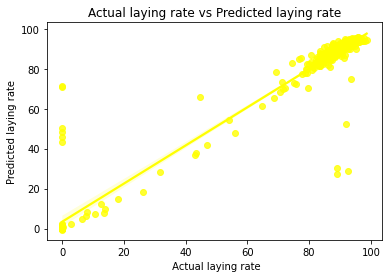

In [146]:
from sklearn.svm import SVR
svm = SVR(kernel = 'linear')
svm.fit(X_train, y_train)
y_pred_SVM = svm.predict(X_test)
sns.regplot(x=y_test ,y= y_pred_SVM,color ="yellow")
# plt.scatter(y_test, y_pred)
plt.xlabel(" Actual laying rate")
plt.ylabel("Predicted laying rate")
plt.title("Actual laying rate vs Predicted laying rate")
plt.show()



In [147]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred_SVM))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_SVM)))
from sklearn.metrics import r2_score
print("r2",r2_score(y_test,y_pred_SVM))


MSE 72.87537454150554
RMSE 8.536707476627363
r2 0.9425624453167534


# Decision Tree

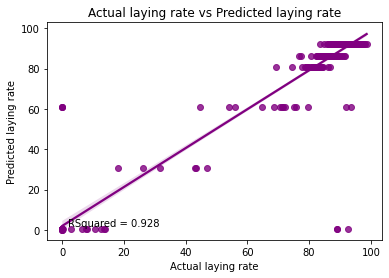

In [148]:
from sklearn.tree import DecisionTreeRegressor
DTregressor = DecisionTreeRegressor(max_depth=4,
                           min_samples_split=5,
                           max_leaf_nodes=10)
DTregressor.fit(X_train, y_train)
y_pred_DT = DTregressor.predict(X_test)
# plt.scatter(y_test, y_pred)
sns.regplot(x=y_test ,y= y_pred_DT,color ="purple")
plt.xlabel("Actual laying rate")
plt.ylabel("Predicted laying rate")
plt.title("Actual laying rate vs Predicted laying rate")
plt.annotate("RSquared = {:.3f}".format(r2_score(y_test, y_pred_DT)), (2,2))
plt.show()


In [149]:
from sklearn.metrics import mean_squared_error
print("MSE",mean_squared_error(y_test,y_pred_DT))
print("RMSE",np.sqrt(mean_squared_error(y_test,y_pred_DT)))
from sklearn.metrics import r2_score
print("r2",r2_score(y_test,y_pred_DT))


MSE 90.96834372830084
RMSE 9.537732630363509
r2 0.9283022660231708


In [150]:
from sklearn import tree
text_repr = tree.export_text(DTregressor)
print(text_repr)

|--- feature_32 <= -1.10
|   |--- feature_32 <= -1.97
|   |   |--- value: [0.66]
|   |--- feature_32 >  -1.97
|   |   |--- feature_34 <= -1.56
|   |   |   |--- value: [94.01]
|   |   |--- feature_34 >  -1.56
|   |   |   |--- feature_33 <= 2.57
|   |   |   |   |--- value: [30.55]
|   |   |   |--- feature_33 >  2.57
|   |   |   |   |--- value: [0.24]
|--- feature_32 >  -1.10
|   |--- feature_32 <= 0.01
|   |   |--- feature_11 <= 2.37
|   |   |   |--- feature_0 <= -1.66
|   |   |   |   |--- value: [0.00]
|   |   |   |--- feature_0 >  -1.66
|   |   |   |   |--- value: [60.95]
|   |   |--- feature_11 >  2.37
|   |   |   |--- value: [0.00]
|   |--- feature_32 >  0.01
|   |   |--- feature_32 <= 0.42
|   |   |   |--- feature_32 <= 0.26
|   |   |   |   |--- value: [80.75]
|   |   |   |--- feature_32 >  0.26
|   |   |   |   |--- value: [86.35]
|   |   |--- feature_32 >  0.42
|   |   |   |--- value: [92.15]



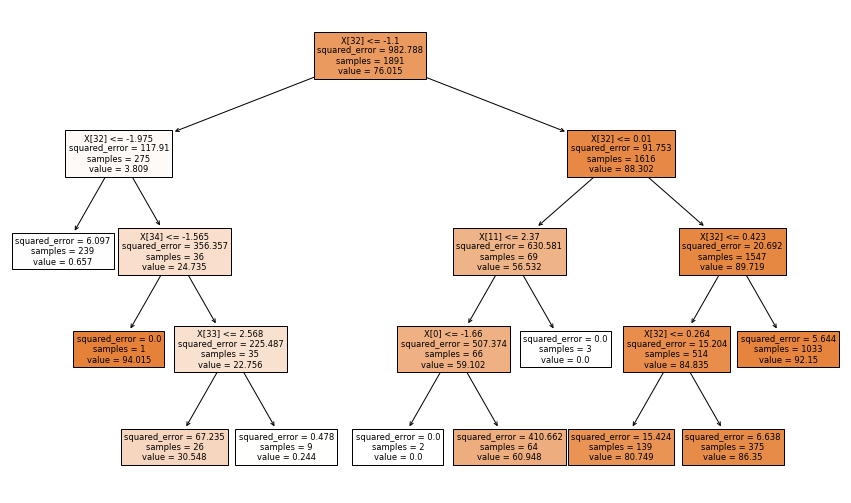

In [151]:
fig = plt.figure(figsize=(15,9))
_ = tree.plot_tree(DTregressor, feature_names=X_train.dtype.names, filled=True)

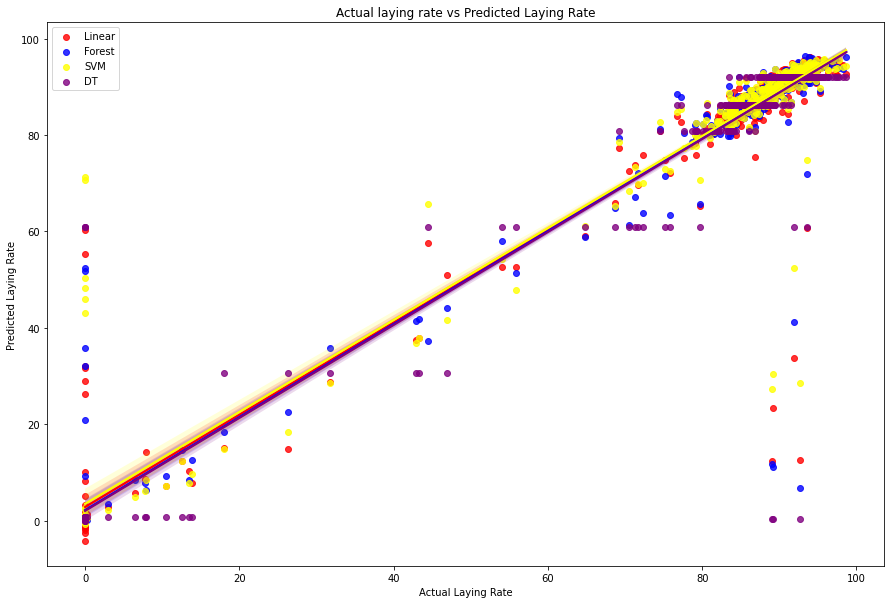

In [152]:
# Plotting both the curves simultaneously
plt.figure(figsize=(15, 10))
sns.regplot(x=y_test ,y= y_pred_ln,color ="red", label = 'Linear')
sns.regplot(x=y_test ,y= y_pred_fr,color ="blue", label ='Forest')
sns.regplot(x=y_test ,y= y_pred_SVM,color ="yellow", label = 'SVM')
sns.regplot(x=y_test ,y= y_pred_DT,color ="purple", label='DT')
  
# Naming the x-axis, y-axis and the whole graph
plt.xlabel("Actual Laying Rate")
plt.ylabel("Predicted Laying Rate")
plt.title("Actual laying rate vs Predicted Laying Rate")
  
# Adding legend, which helps us recognize the curve according to it's color
plt.legend()
  
# To load the display window
plt.show()

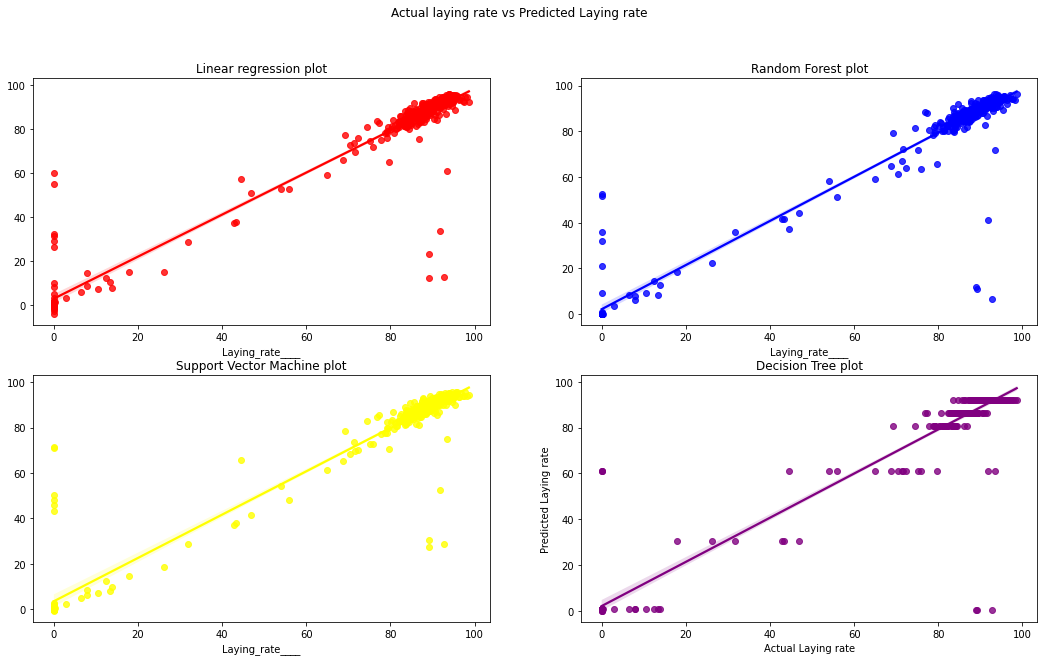

In [153]:
fig, axes = plt.subplots(2, 2, figsize=(18, 10))

fig.suptitle('Actual laying rate vs Predicted Laying rate')

## Linear
sns.regplot(ax=axes[0, 0],x=y_test ,y= y_pred_ln,color ="red", label = 'Linear')
axes[0,0].set_title('Linear regression plot')
# axes.set(xlabel='x-axis label', ylabel='y-axis label'

## Random forest
sns.regplot(ax=axes[0, 1],x=y_test ,y= y_pred_fr,color ="blue", label ='Forest')
axes[0,1].set_title('Random Forest plot')


#Support Vector Machine
sns.regplot(ax=axes[1, 0],x=y_test ,y= y_pred_SVM,color ="yellow", label = 'SVM')
axes[1,0].set_title('Support Vector Machine plot')


## Decision Tree
sns.regplot(ax=axes[1, 1],x=y_test ,y= y_pred_DT,color ="purple", label='DT')
axes[1,1].set_title('Decision Tree plot')
plt.xlabel("Actual Laying rate")
plt.ylabel("Predicted Laying rate")
plt.show()

## Improving the model

In [154]:
from sklearn.ensemble import BaggingRegressor

In [155]:
df_2.head(5)

,Age_of_hens__days_,Laying_rate____,Hours_of_light,Indoor_Minimum_temperature__C_,Indoor_Maximum_temperature__C_,Solar_radiation__MJ___meter_squared_per_day_,Vapour_pressure_3pm__kilopascal_,Vapour_pressure_9am__kilopascal_,Outdoor_Minimum_temperature__C__,Outdoor_Maximum_temperature__C__,...,vp_9am_mean,vp_9am_std,vp_3pm_mean,vp_3pm_std,solar_radiation_mean,solar_radiation_std,laying_rate_mean,laying_rate_std,wind_speed_std,wind_speed_mean
0,116,0.000000,14.25,19.3,30.3,18.59,1.36,1.53,16.77,33.31,...,1.432619,0.183942,1.252073,0.208023,19.331033,3.111382,75.024575,2.332280,0.941495,3.470981
1,117,0.000000,14.25,21.1,31.0,23.56,1.41,2.01,16.69,33.16,...,1.432619,0.183942,1.252073,0.208023,19.331033,3.111382,75.024575,2.332280,0.941495,3.470981
2,118,0.000000,14.25,22.5,32.6,18.80,1.30,1.72,16.32,33.45,...,1.432619,0.183942,1.252073,0.208023,19.331033,3.111382,75.024575,2.332280,0.941495,3.470981
3,119,0.000000,14.25,22.0,31.9,18.02,2.22,1.79,17.46,32.20,...,1.762500,0.198221,1.572500,0.434003,19.742500,2.566247,0.000000,0.000000,0.634527,2.522500
4,120,0.037544,14.25,21.6,30.9,24.85,1.23,1.95,19.10,34.87,...,1.867500,0.135247,1.540000,0.459347,21.307500,3.401876,0.009386,0.018772,0.620665,2.507500


In [156]:
df_2.shape

(2364, 37)

##Adjusted Linear Regression

In [157]:
# automatic feature selection by using featurewiz package
# target = 'Laying_rate____'
# features, train = featurewiz(df_2, target, corr_limit=0.95, verbose=1)

In [158]:
# train.shape

In [159]:
X_new = df_2.drop('Laying_rate____', axis=1)
y_new = df_2['Laying_rate____']

In [160]:
#split data into train and validate 
X_train1, X_val1, y_train1, y_val1 = train_test_split(X_new,y_new,test_size = 0.2,random_state=1)

In [161]:
Bag=BaggingRegressor(base_estimator=LinearRegression(), n_estimators=30, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=1, random_state=None, verbose=0)
Bag.fit(X_new,y_new)
bagpredict_test=Bag.predict(X_val1)


In [162]:
### to estimate the accuracy of the Bagging model ###
mean_squared_error(y_val1, bagpredict_test, sample_weight=None, multioutput='uniform_average')

54.34840506483207

In [163]:
print("MSE",mean_squared_error(y_val1, bagpredict_test, sample_weight=None, multioutput='uniform_average'))
print("RMSE",np.sqrt(mean_squared_error(y_val1, bagpredict_test, sample_weight=None, multioutput='uniform_average')))
from sklearn.metrics import r2_score
print("r2",r2_score(y_val1, bagpredict_test, sample_weight=None, multioutput='uniform_average'))

MSE 54.34840506483207
RMSE 7.372137075830324
r2 0.9472909864564181


Text(0, 1, 'RSquared = 0.947')

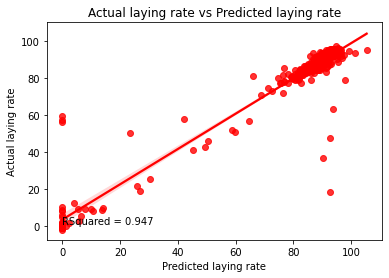

In [164]:
sns.regplot(x=y_val1 ,y= bagpredict_test,color ="red")
plt.xlabel("Predicted laying rate")
plt.ylabel("Actual laying rate")
plt.title("Actual laying rate vs Predicted laying rate")
plt.annotate("RSquared = {:.3f}".format(r2_score(y_val1, bagpredict_test, sample_weight=None, multioutput='uniform_average')), (0, 1))


##SVM

In [165]:
# Bag=BaggingRegressor(base_estimator=SVR(kernel = 'linear'), n_estimators=30, max_samples=1.0, max_features=1.0, bootstrap=True, bootstrap_features=False, oob_score=False, warm_start=False, n_jobs=1, random_state=None, verbose=0)
# Bag.fit(X_new,y_new)
# bagpredict_test=Bag.predict(X_val1)


In [166]:
# print("MSE",mean_squared_error(y_val1, bagpredict_test, sample_weight=None, multioutput='uniform_average'))
# print("RMSE",np.sqrt(mean_squared_error(y_val1, bagpredict_test, sample_weight=None, multioutput='uniform_average')))
# from sklearn.metrics import r2_score
# print("r2",r2_score(y_val1, bagpredict_test, sample_weight=None, multioutput='uniform_average'))

In [167]:
# sns.regplot(x=y_val1 ,y= bagpredict_test,color ="yellow")
# plt.xlabel("Predicted laying rate")
# plt.ylabel("Actual laying rate")
# plt.title("Actual laying rate vs Predicted laying rate")
# plt.annotate("RSquared = {:.3f}".format(r2_score(y_val1, bagpredict_test, sample_weight=None, multioutput='uniform_average')), (0, 1))


##Model Comparison plot

In [168]:
# # Prepare default models
models = []
models.append(('LR', LinearRegression()))
models.append(('DT', DecisionTreeRegressor()))
models.append(('RF', RandomForestRegressor(n_estimators=100)))
models.append(('SVM', SVR(kernel ='linear')))

LR : 0.969703 (5.712098)
DT : 0.941452 (7.940590)
RF : 0.972653 (5.426910)
SVM : 0.971938 (5.497430)


<Figure size 1080x576 with 0 Axes>

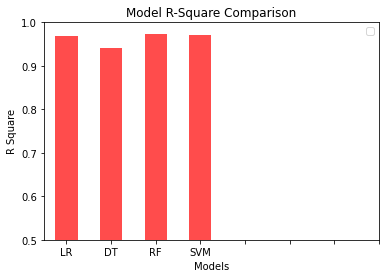

<Figure size 1080x576 with 0 Axes>

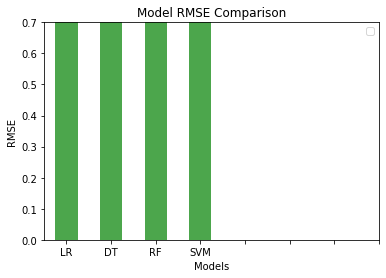

In [170]:
result = []
rsquares = []
rmse = []
names = []
for name, model in models:
    xtrain,xtest,ytrain,ytest = train_test_split(X_new,y_new, test_size=0.2, random_state=3)
    model.fit(xtrain,ytrain)
    mod_pred = model.predict(xtest)
    rsquare = r2_score(ytest,mod_pred)
    error = np.sqrt(mean_squared_error(ytest,mod_pred))
    rsquares.append(rsquare)
    rmse.append(error)
    names.append(name)
    a = pd.DataFrame(rsquares)
    b = pd.DataFrame(rmse)
    print("%s : %f (%f)" %(name, rsquare,error))
#plot - accuracy
plt.figure(figsize=[15,8])
a.plot(kind='bar', alpha=0.7, color='r', rot=0)
plt.xticks([0,1,2,3,4,5,6,7], names)
plt.ylim(0.5,1)
plt.xlabel('Models')
plt.ylabel("R Square")
plt.title("Model R-Square Comparison")
plt.legend("")
plt.show()

#plot - RMSE
plt.figure(figsize=[15,8])
b.plot(kind='bar', alpha=0.7, color='g', rot=0)
plt.xticks([0,1,2,3,4,5,6,7], names)
plt.ylim(0,0.7)
plt.xlabel('Models')
plt.ylabel("RMSE")
plt.title("Model RMSE Comparison")
plt.legend("")
plt.show()

In [ ]:
a.plot()